<a href="https://colab.research.google.com/github/sunshineluyao/ml4blockchain/blob/main/codes/NLP_ML4Blockchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 0: Set-up

In [1]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 21.0 MB/s eta 0:00:00


In [2]:
pip install igviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np

In [7]:
import pandas as pd
import requests
import chardet

url = "https://raw.githubusercontent.com/sunshineluyao/ml4blockchain/main/data/references.csv"
raw_data = requests.get(url).content
result = chardet.detect(raw_data)
encoding = result['encoding']

df = pd.read_csv(url, encoding=encoding)
df


Item type                                            Authors  \
0    Journal Article                         Chen F,Wan H,Cai H,Cheng G   
1    Journal Article                             Wang T,Liew SC,Zhang S   
2    Journal Article                                    Zhang L,Zhang F   
3   Conference Paper                                      Liu Y,Zhang L   
4   Conference Paper          Liu Y,Lu Y,Nayak K,Zhang F,Zhang L,Zhao Y   
5   Conference Paper               Bar-Zur R,Abu-Hanna A,Eyal I,Tamar A   
6    Journal Article  Hou C,Zhou M,Ji Y,Daian P,Tramer F,Fanti G,Jue...   
7   Conference Paper  Nadeem A,Vos D,Cao C,Pajola L,Dieck S,Baumgart...   
8    Journal Article                          Jiang H,Nagra J,Ahammad P   
9    Journal Article  Tanwar S,Bhatia Q,Patel P,Kumari A,Singh PK,Ho...   
10   Journal Article    Waheed N,He X,Ikram M,Usman M,Hashmi SS,Usman M   
11   Journal Article       Yang Q,Zhao Y,Huang H,Xiong Z,Kang J,Zheng Z   
12   Journal Article         Salah K,Rehman MH,Nizamuddin N,Al-Fuqaha A   
13   Journal Article  Li D,Han D,Weng TH,Zheng Z,Li H,Liu H,Castigli...   
14   Journal Article             Zhu J,Cao J,Saxena D,Jiang S,Ferradi H   
15   Journal Article                     Liu Y,Yu FR,Li X,Ji H,Leung VC   
16   Journal Article                                             Gong Y   
17   Journal Article                Gai Y,Zhou L,Qin K,Song D,Gervais A   
18   Journal Article          Dai Y,Xu D,Maharjan S,Chen Z,He Q,Zhang Y   
19  Conference Paper                 Mallouh AA,Abuzaghleh O,Qawaqneh Z   
20   Journal Article       Qu Y,Uddin MP,Gan C,Xiang Y,Gao L,Yearwood J   

                                                Title  \
0   Machine learning in/for blockchain: Future and...   
1   When blockchain meets AI: Optimal mining strat...   
2   Understand Waiting Time in Transaction Fee Mec...   
3   Cryptocurrency valuation: An explainable ai ap...   
4   Empirical analysis of eip-1559: Transaction fe...   
5   WeRLman: to tackle whale (transactions), go de...   
6   SquirRL: Automating attack analysis on blockch...   
7   Sok: Explainable machine learning for computer...   
8   Sok: Applying machine learning in security-a s...   
9   Machine learning adoption in blockchain-based ...   
10  Security and privacy in IoT using machine lear...   
11  Fusing blockchain and AI with metaverse: A survey   
12  Blockchain for AI: Review and open research ch...   
13  Blockchain for federated learning toward secur...   
14  Blockchain-empowered federated learning: Chall...   
15  Blockchain and machine learning for communicat...   
16       Dynamic large language models on blockchains   
17                   Blockchain large language models   
18  Blockchain and deep reinforcement learning emp...   
19  A hierarchy of deep reinforcement learning age...   
20    Blockchain-enabled federated learning: A survey   

                                         Journal  \
0                 Canadian Journal of Statistics   
1   International Journal of Intelligent Systems   
2               arXiv preprint arXiv:2305. 02552   
3                                            NaN   
4                                            NaN   
5                                            NaN   
6               arXiv preprint arXiv:1912. 01798   
7                                            NaN   
8               arXiv preprint arXiv:1611. 03186   
9                                    IEEE Access   
10                  ACM Computing Surveys (CSUR)   
11     IEEE Open Journal of the Computer Society   
12                                   IEEE Access   
13                                Soft Computing   
14                         ACM Computing Surveys   
15       IEEE Communications Surveys & Tutorials   
16              arXiv preprint arXiv:2307. 10549   
17              arXiv preprint arXiv:2304. 12749   
18                                  IEEE network   
19                                           NaN   
20           

In [8]:
df.columns

Index(['Item type', 'Authors', 'Title', 'Journal', 'Abstract', 'Abstract.1',
       'Abstract.2', 'Abstract.3', 'Pages', 'Institution', 'Publisher',
       'Proceedings title', 'Date published'],
      dtype='object')

# Part I The World Cloud

## 1.1. Title

In [9]:
# Join the different processed titles together.
title = ','.join(list(df['Title'].values))
title

'Machine learning in/for blockchain: Future and challenges,When blockchain meets AI: Optimal mining strategy achieved by machine learning,Understand Waiting Time in Transaction Fee Mechanism: An Interdisciplinary Perspective,Cryptocurrency valuation: An explainable ai approach,Empirical analysis of eip-1559: Transaction fees, waiting times, and consensus security,WeRLman: to tackle whale (transactions), go deep (RL),SquirRL: Automating attack analysis on blockchain incentive mechanisms with deep reinforcement learning,Sok: Explainable machine learning for computer security applications,Sok: Applying machine learning in security-a survey,Machine learning adoption in blockchain-based smart applications: The challenges, and a way forward,Security and privacy in IoT using machine learning and blockchain: Threats and countermeasures,Fusing blockchain and AI with metaverse: A survey,Blockchain for AI: Review and open research challenges,Blockchain for federated learning toward secure distrib

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
stop_words = stopwords.words('english')
stop_words.extend([',',"SoK","survey",":","A","on","in","into","the","for","review","."])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

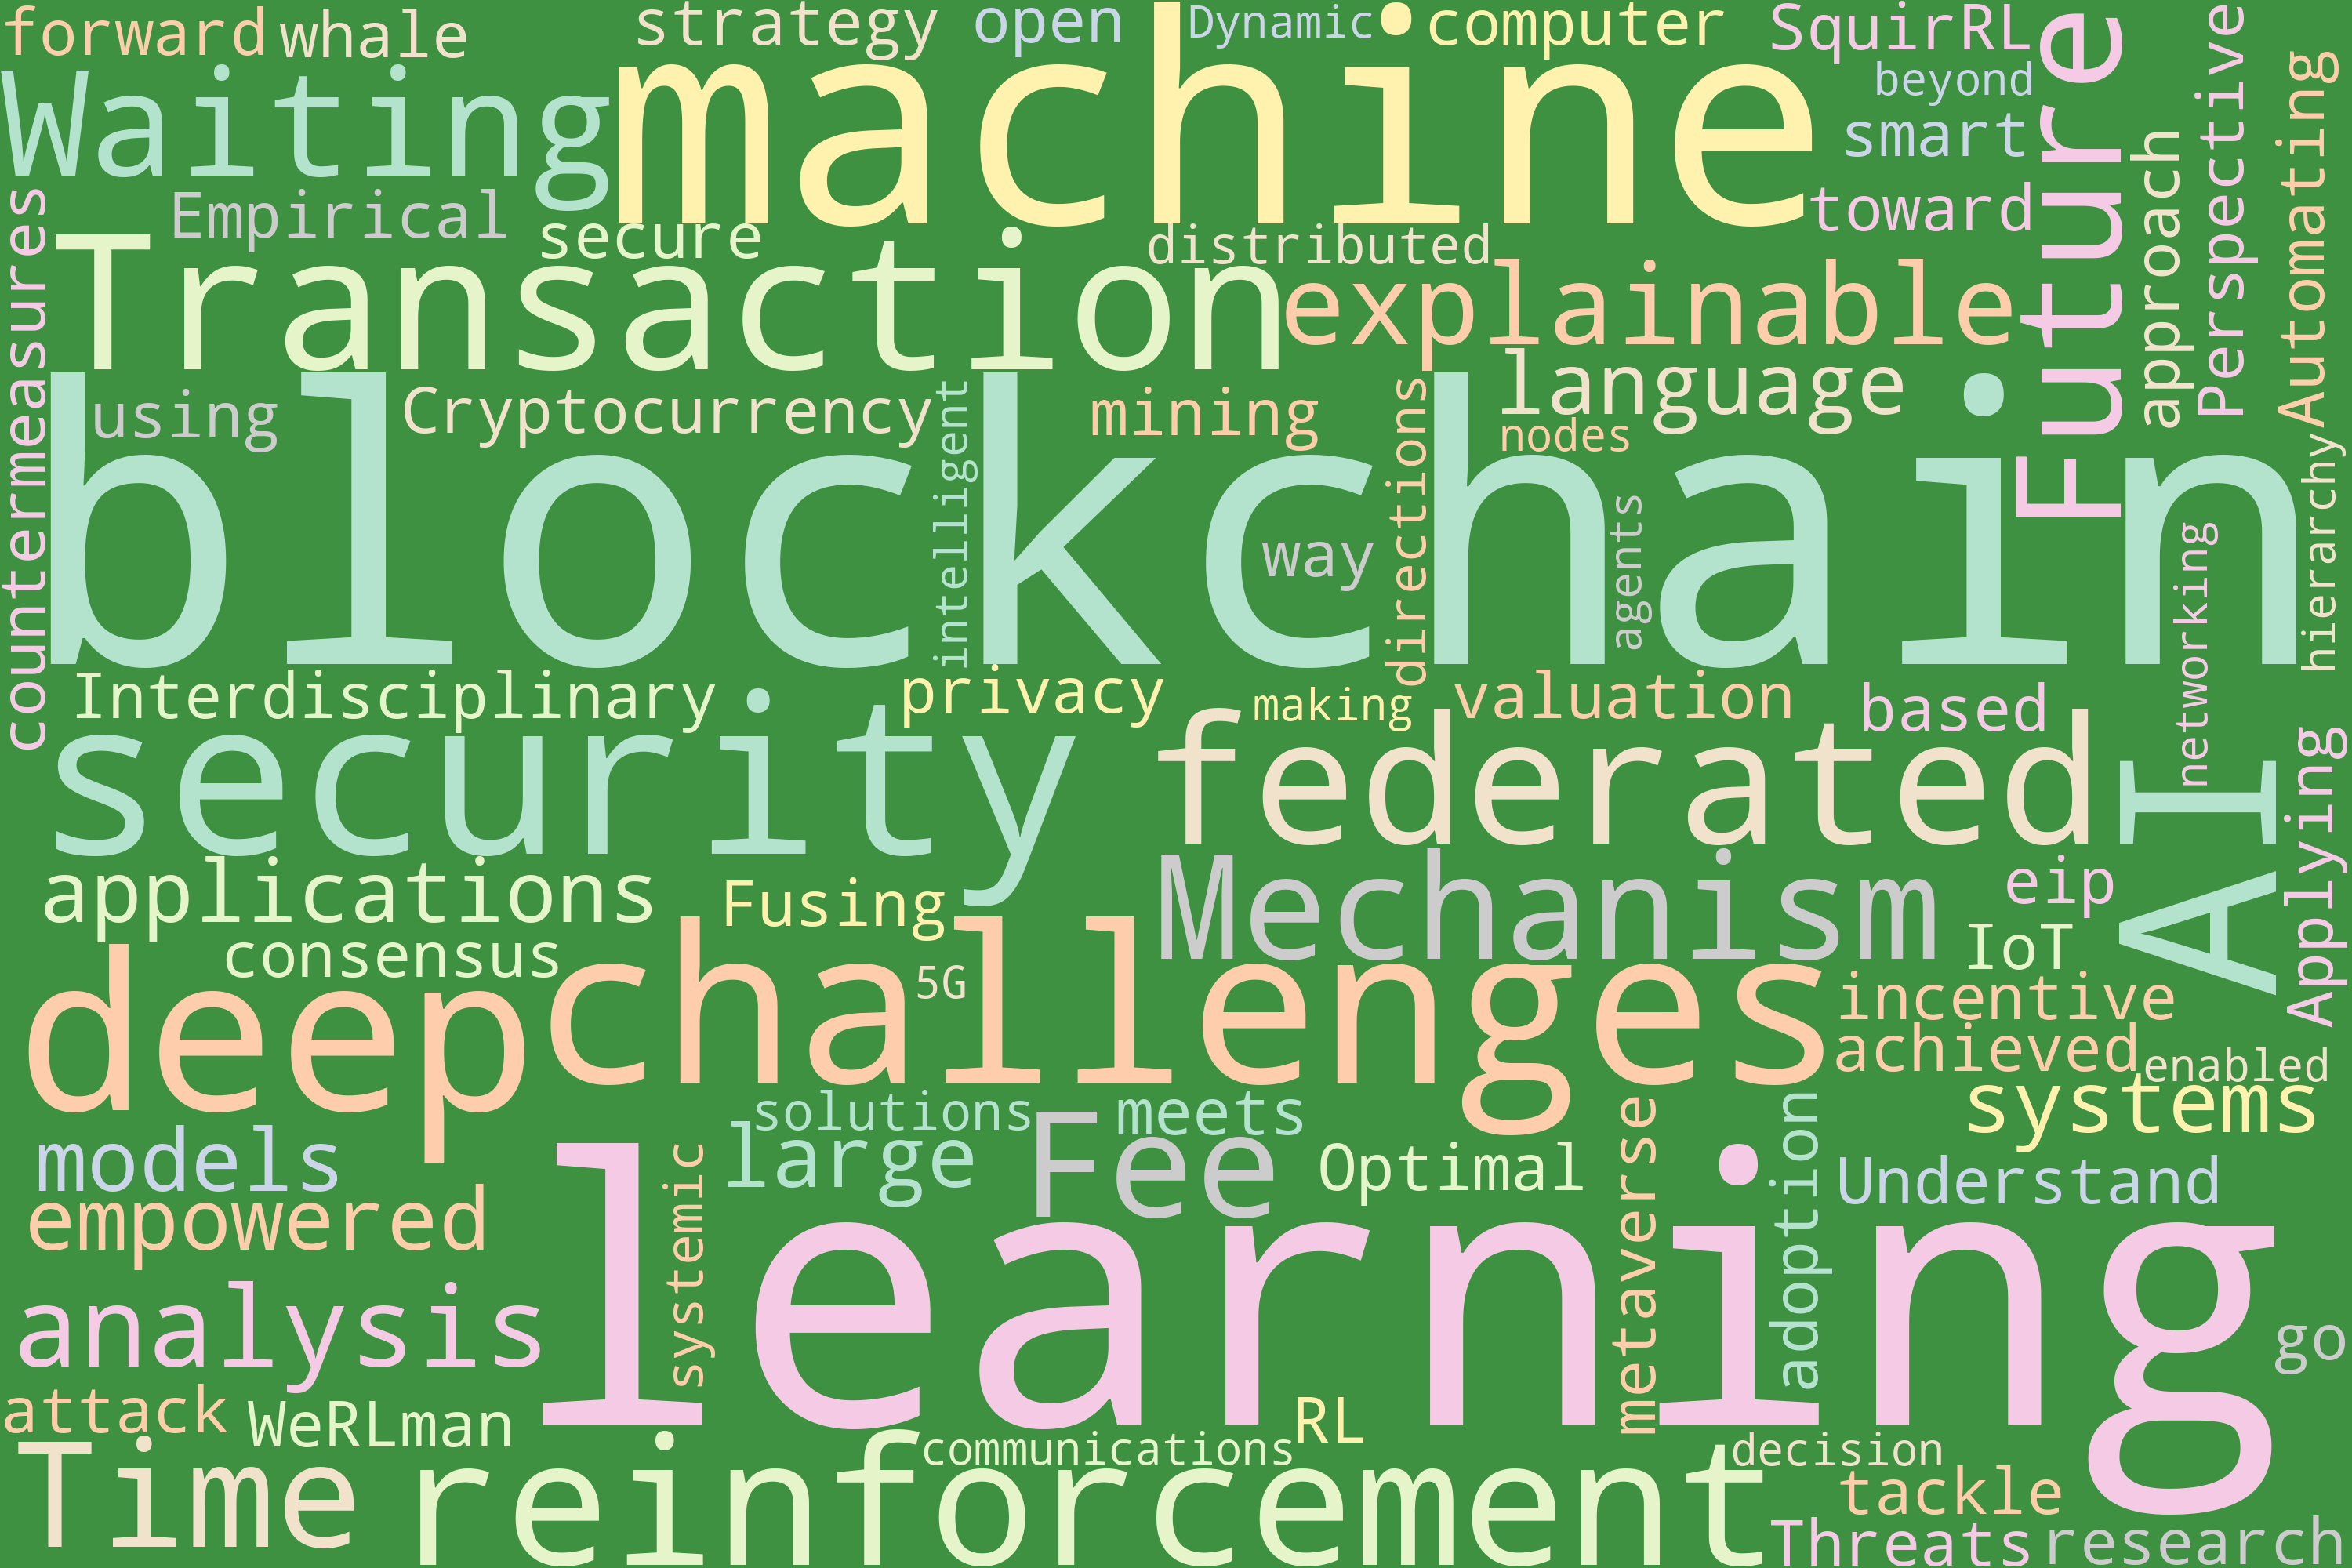

In [13]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# show the word cloud
wordcloud.to_image()

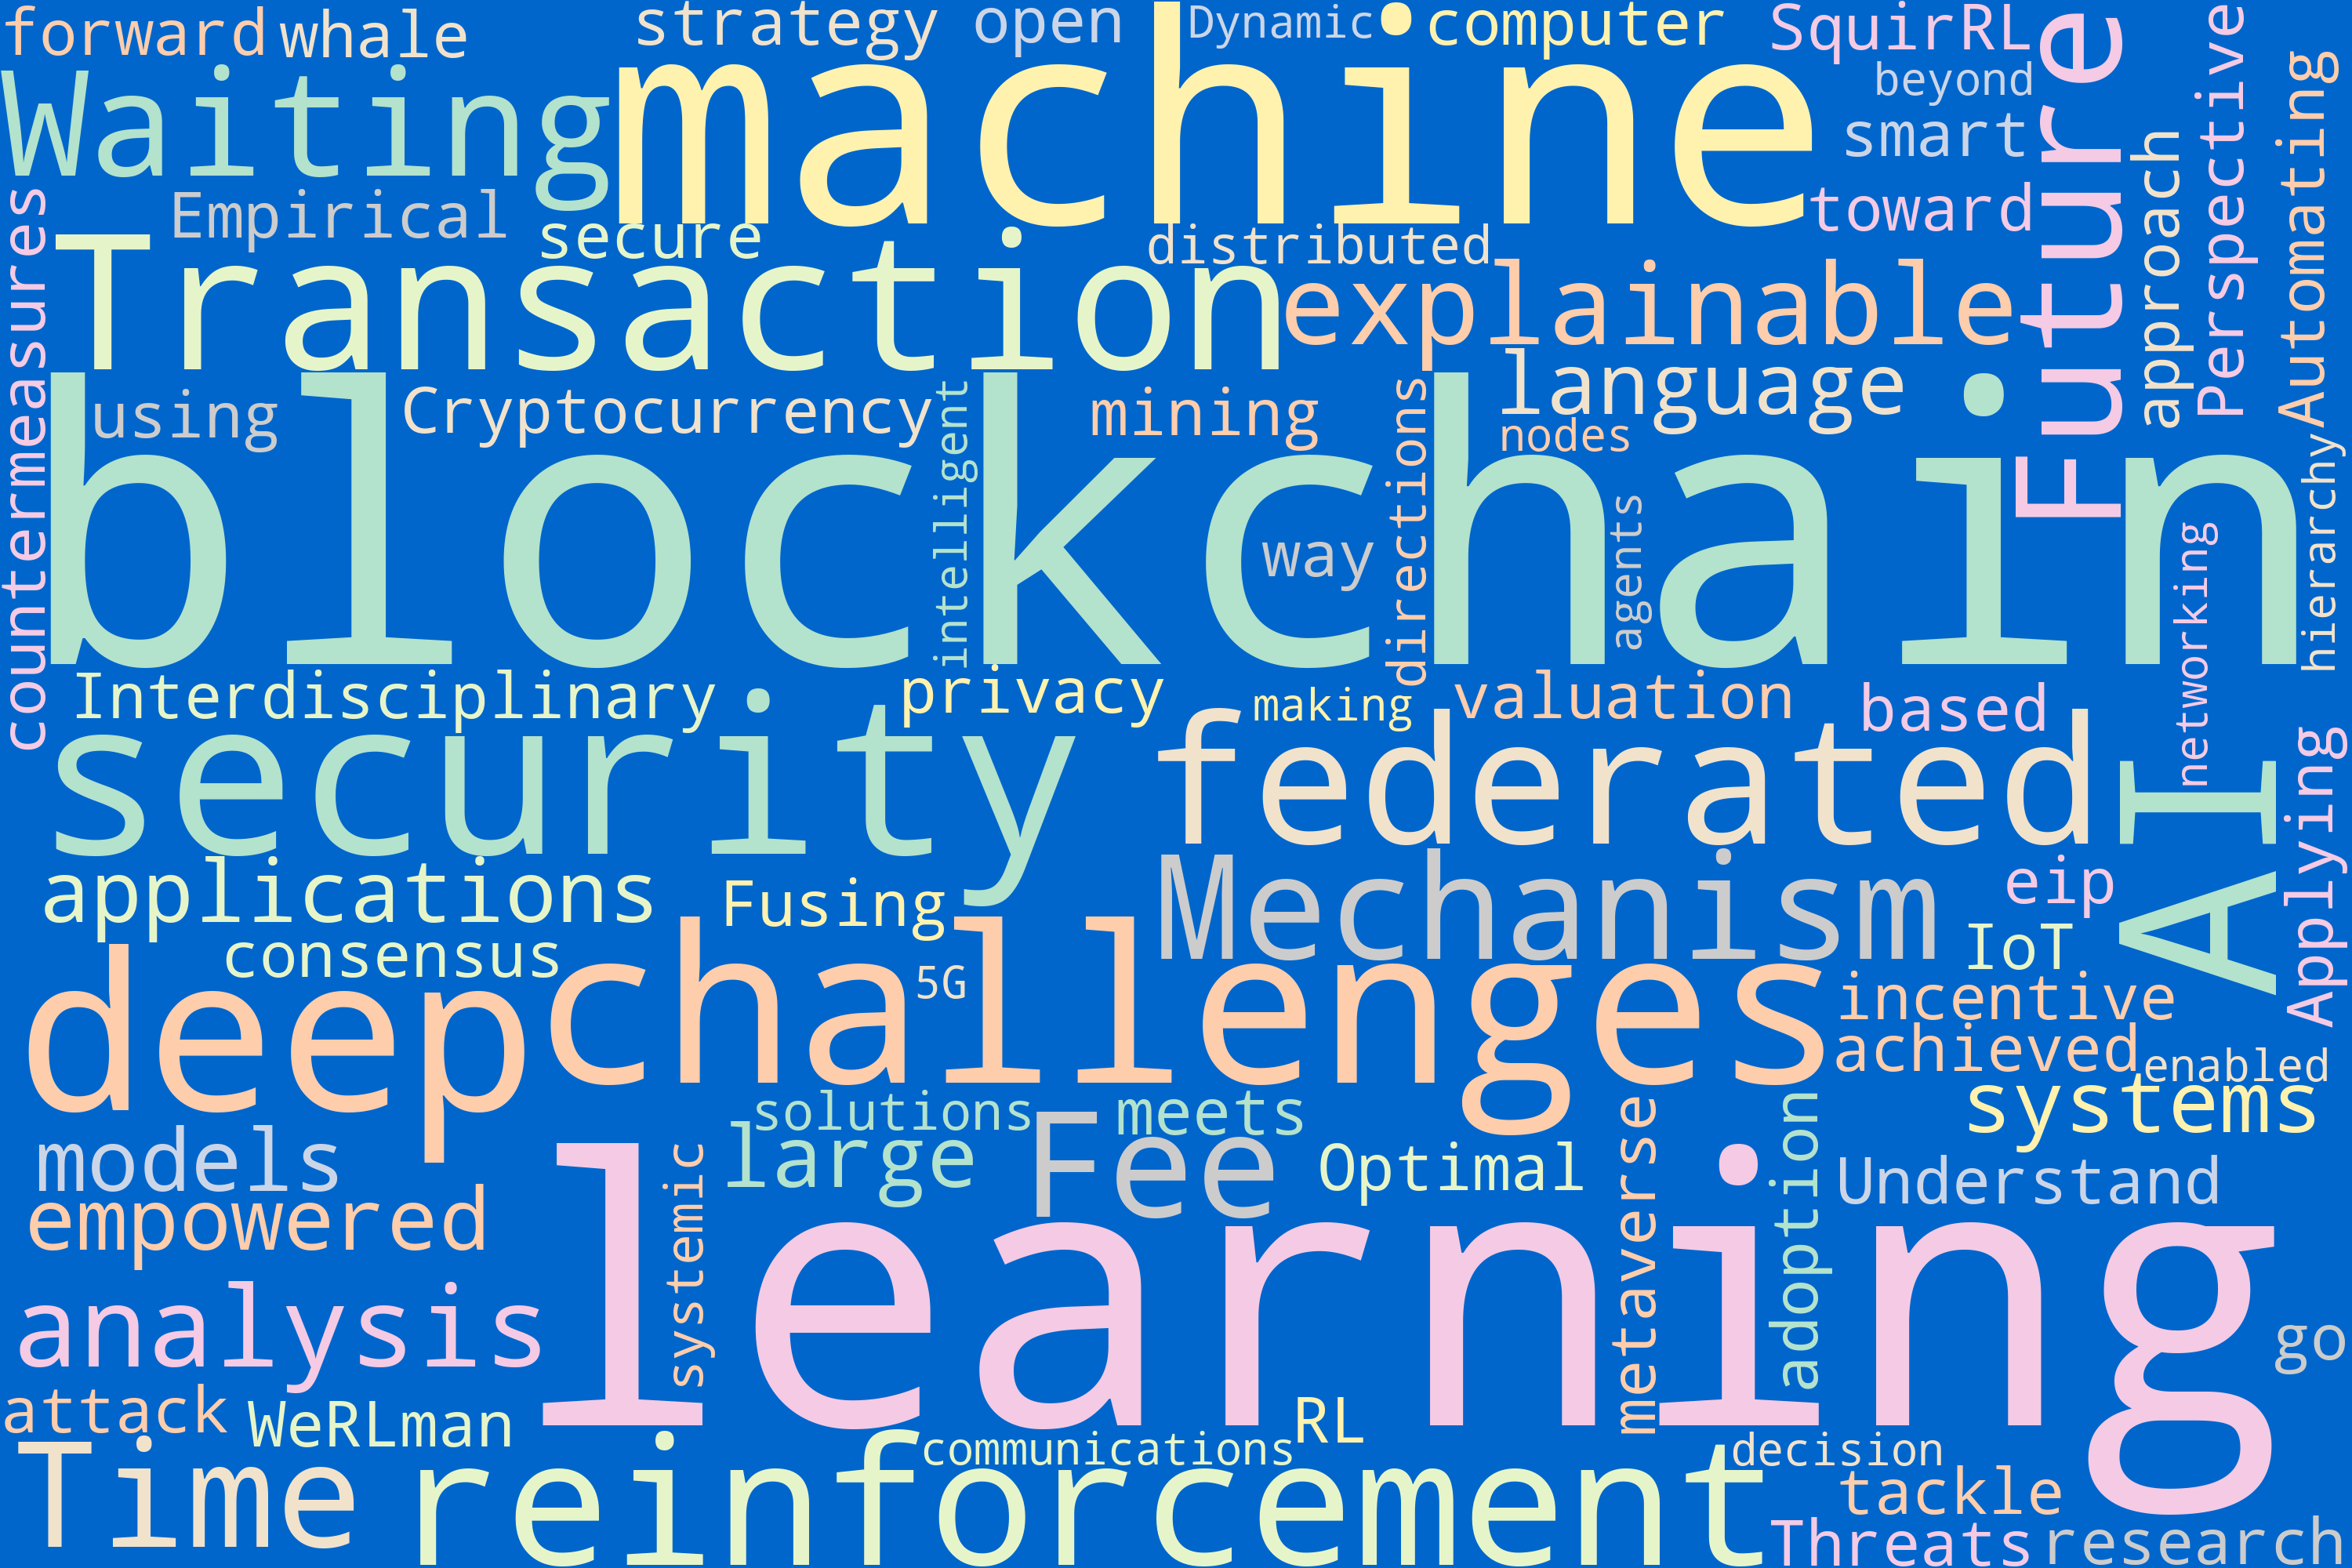

In [14]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# Show the word cloud
wordcloud.to_image()

## 1.2. Abstract

In [15]:
# Join the different processed titles together.
Abstract = ','.join(list(df['Abstract'].values))
Abstract

"Machine learning and blockchain are two of the most notable technologies of recent years. The first is the foundation of artificial intelligence and big data analysis, and the second has significantly disrupted the financial industry. Both technologies are data‐driven, and thus there are rapidly growing interests in integrating both for more secure and efficient data sharing and analysis. In this article, we review existing research on combining machine learning and blockchain technologies and demonstrate that they can collaborate efficiently and effectively. In the end, we point out some future directions and expect more research on deeper integration of these two promising technologies.,This study applies reinforcement learning (RL) from the AI machine learning field to derive an optimal Bitcoin‐like blockchain mining strategy. A salient feature of the RL learning framework is that an optimal (or near‐optimal) strategy can be obtained without knowing the details of the blockchain ne

In [16]:
stop_words = stopwords.words('english')
stop_words.extend(['.'])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

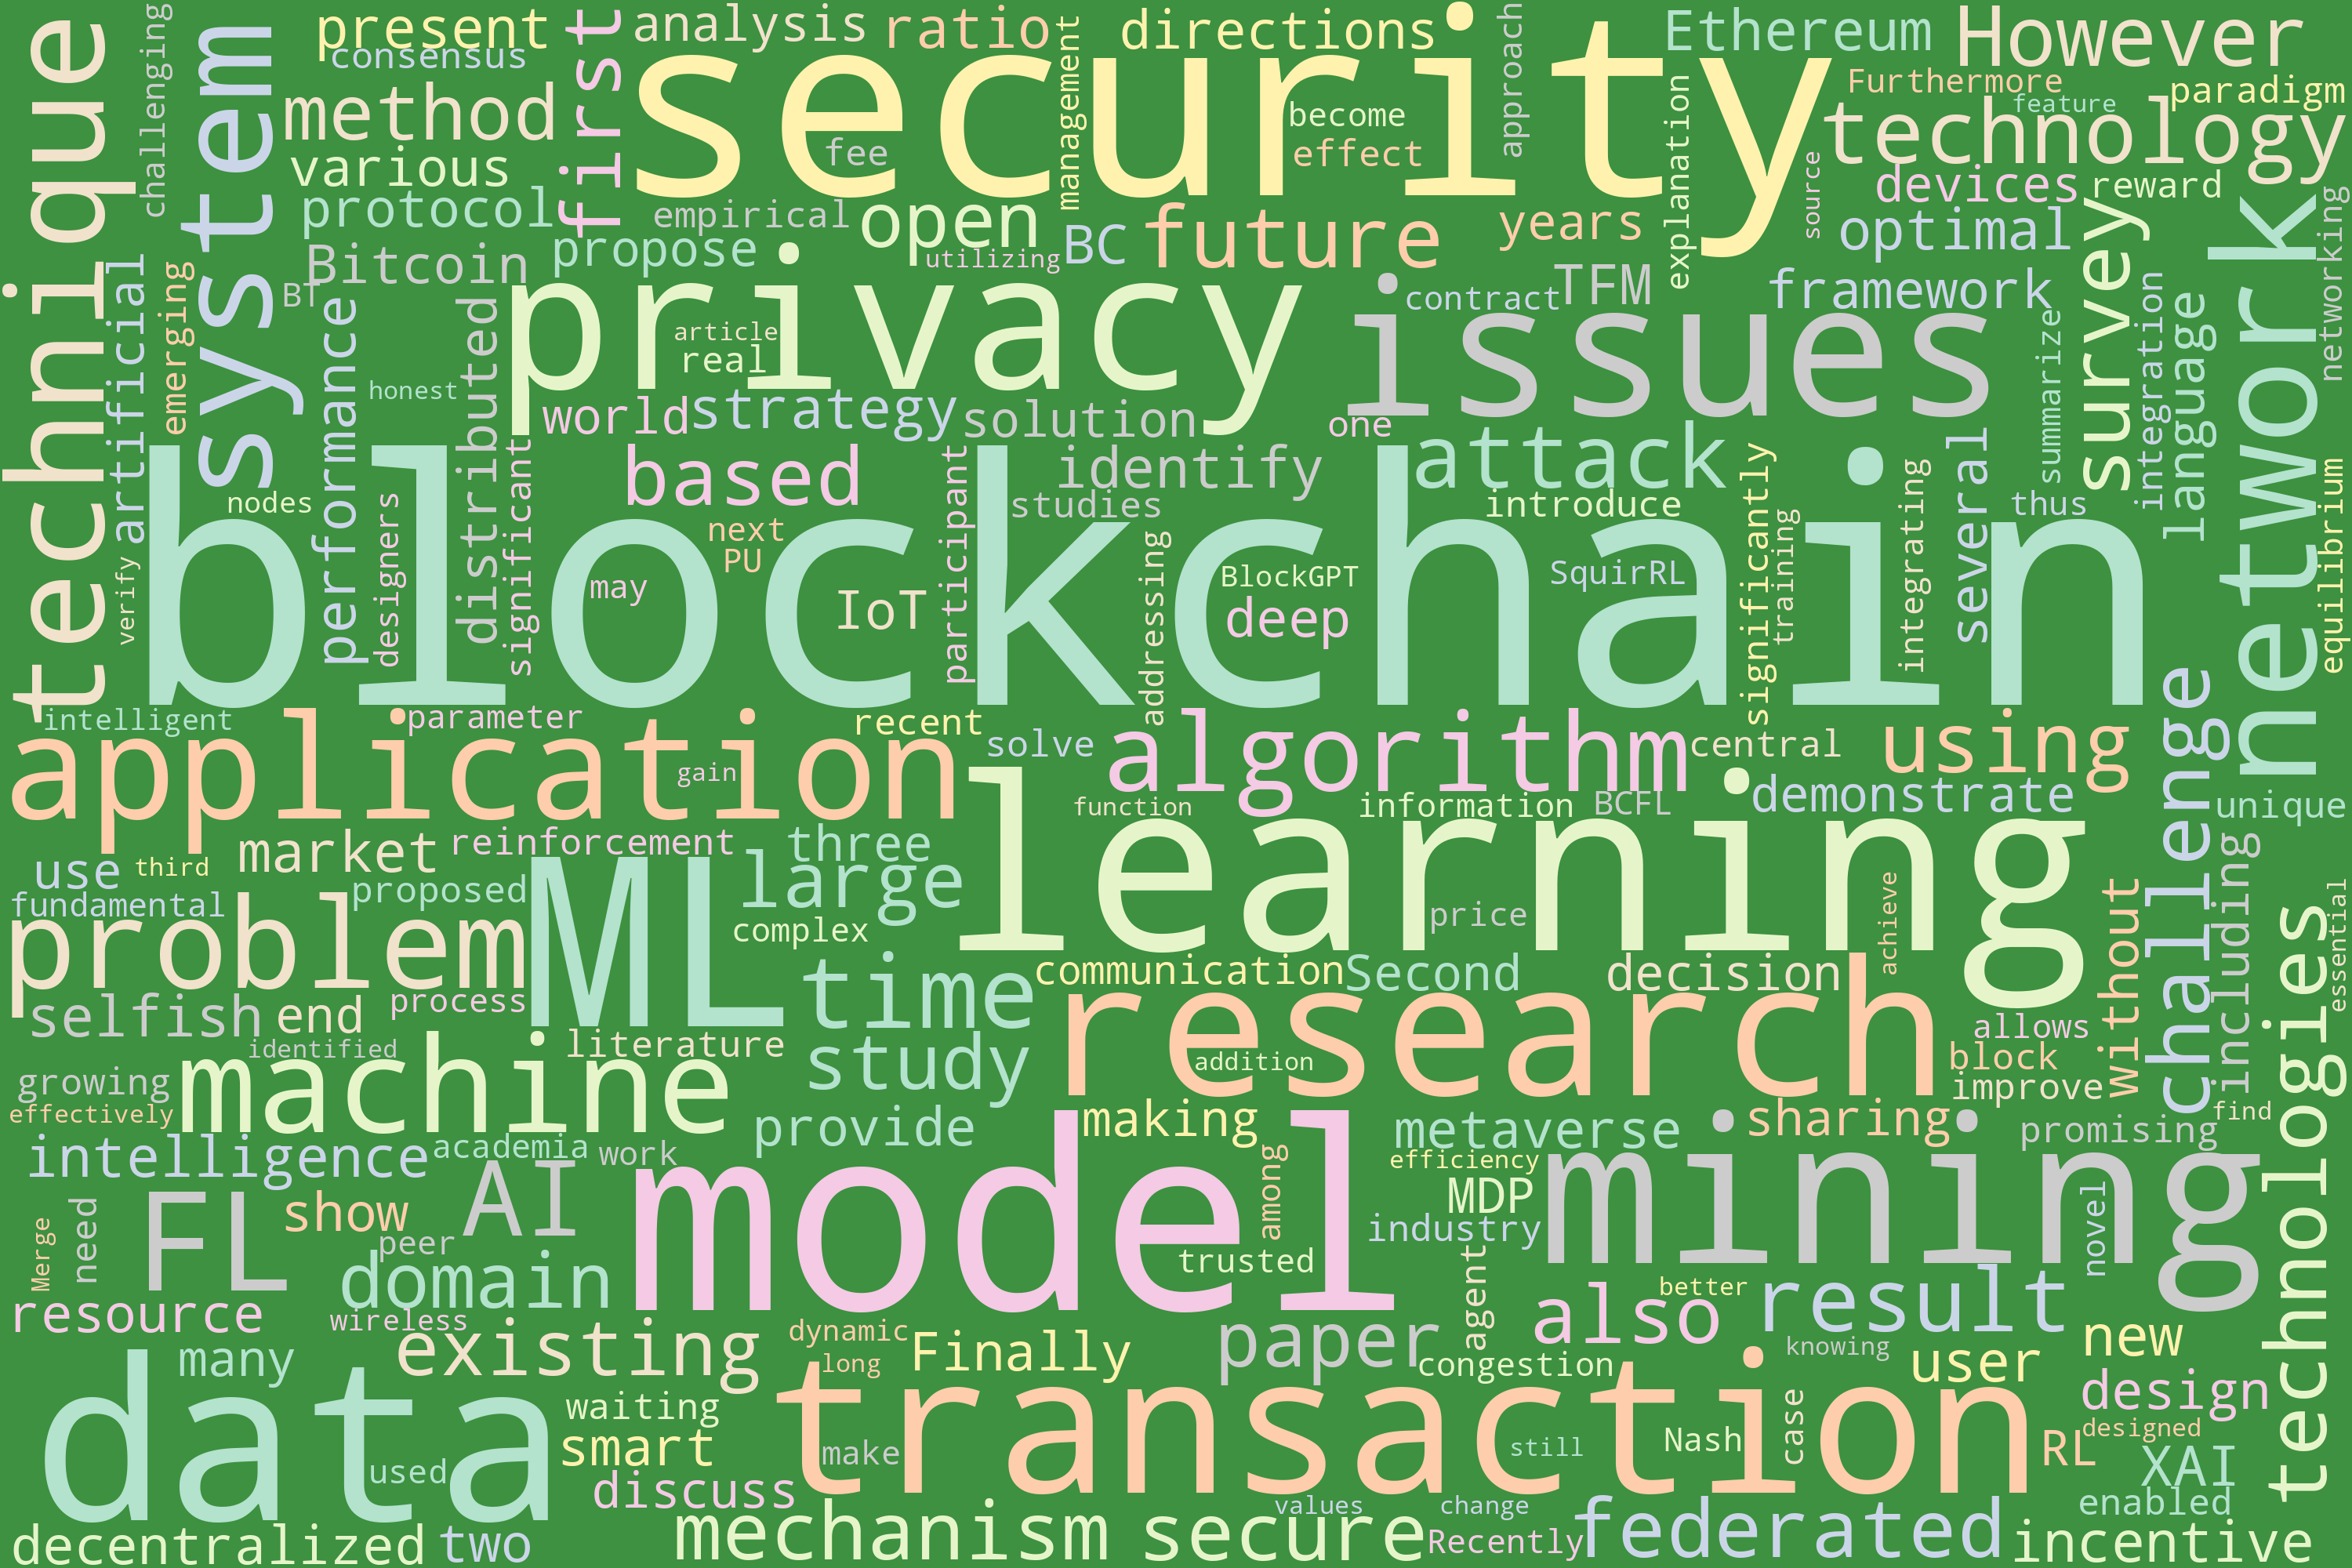

In [17]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# show the word cloud
wordcloud.to_image()

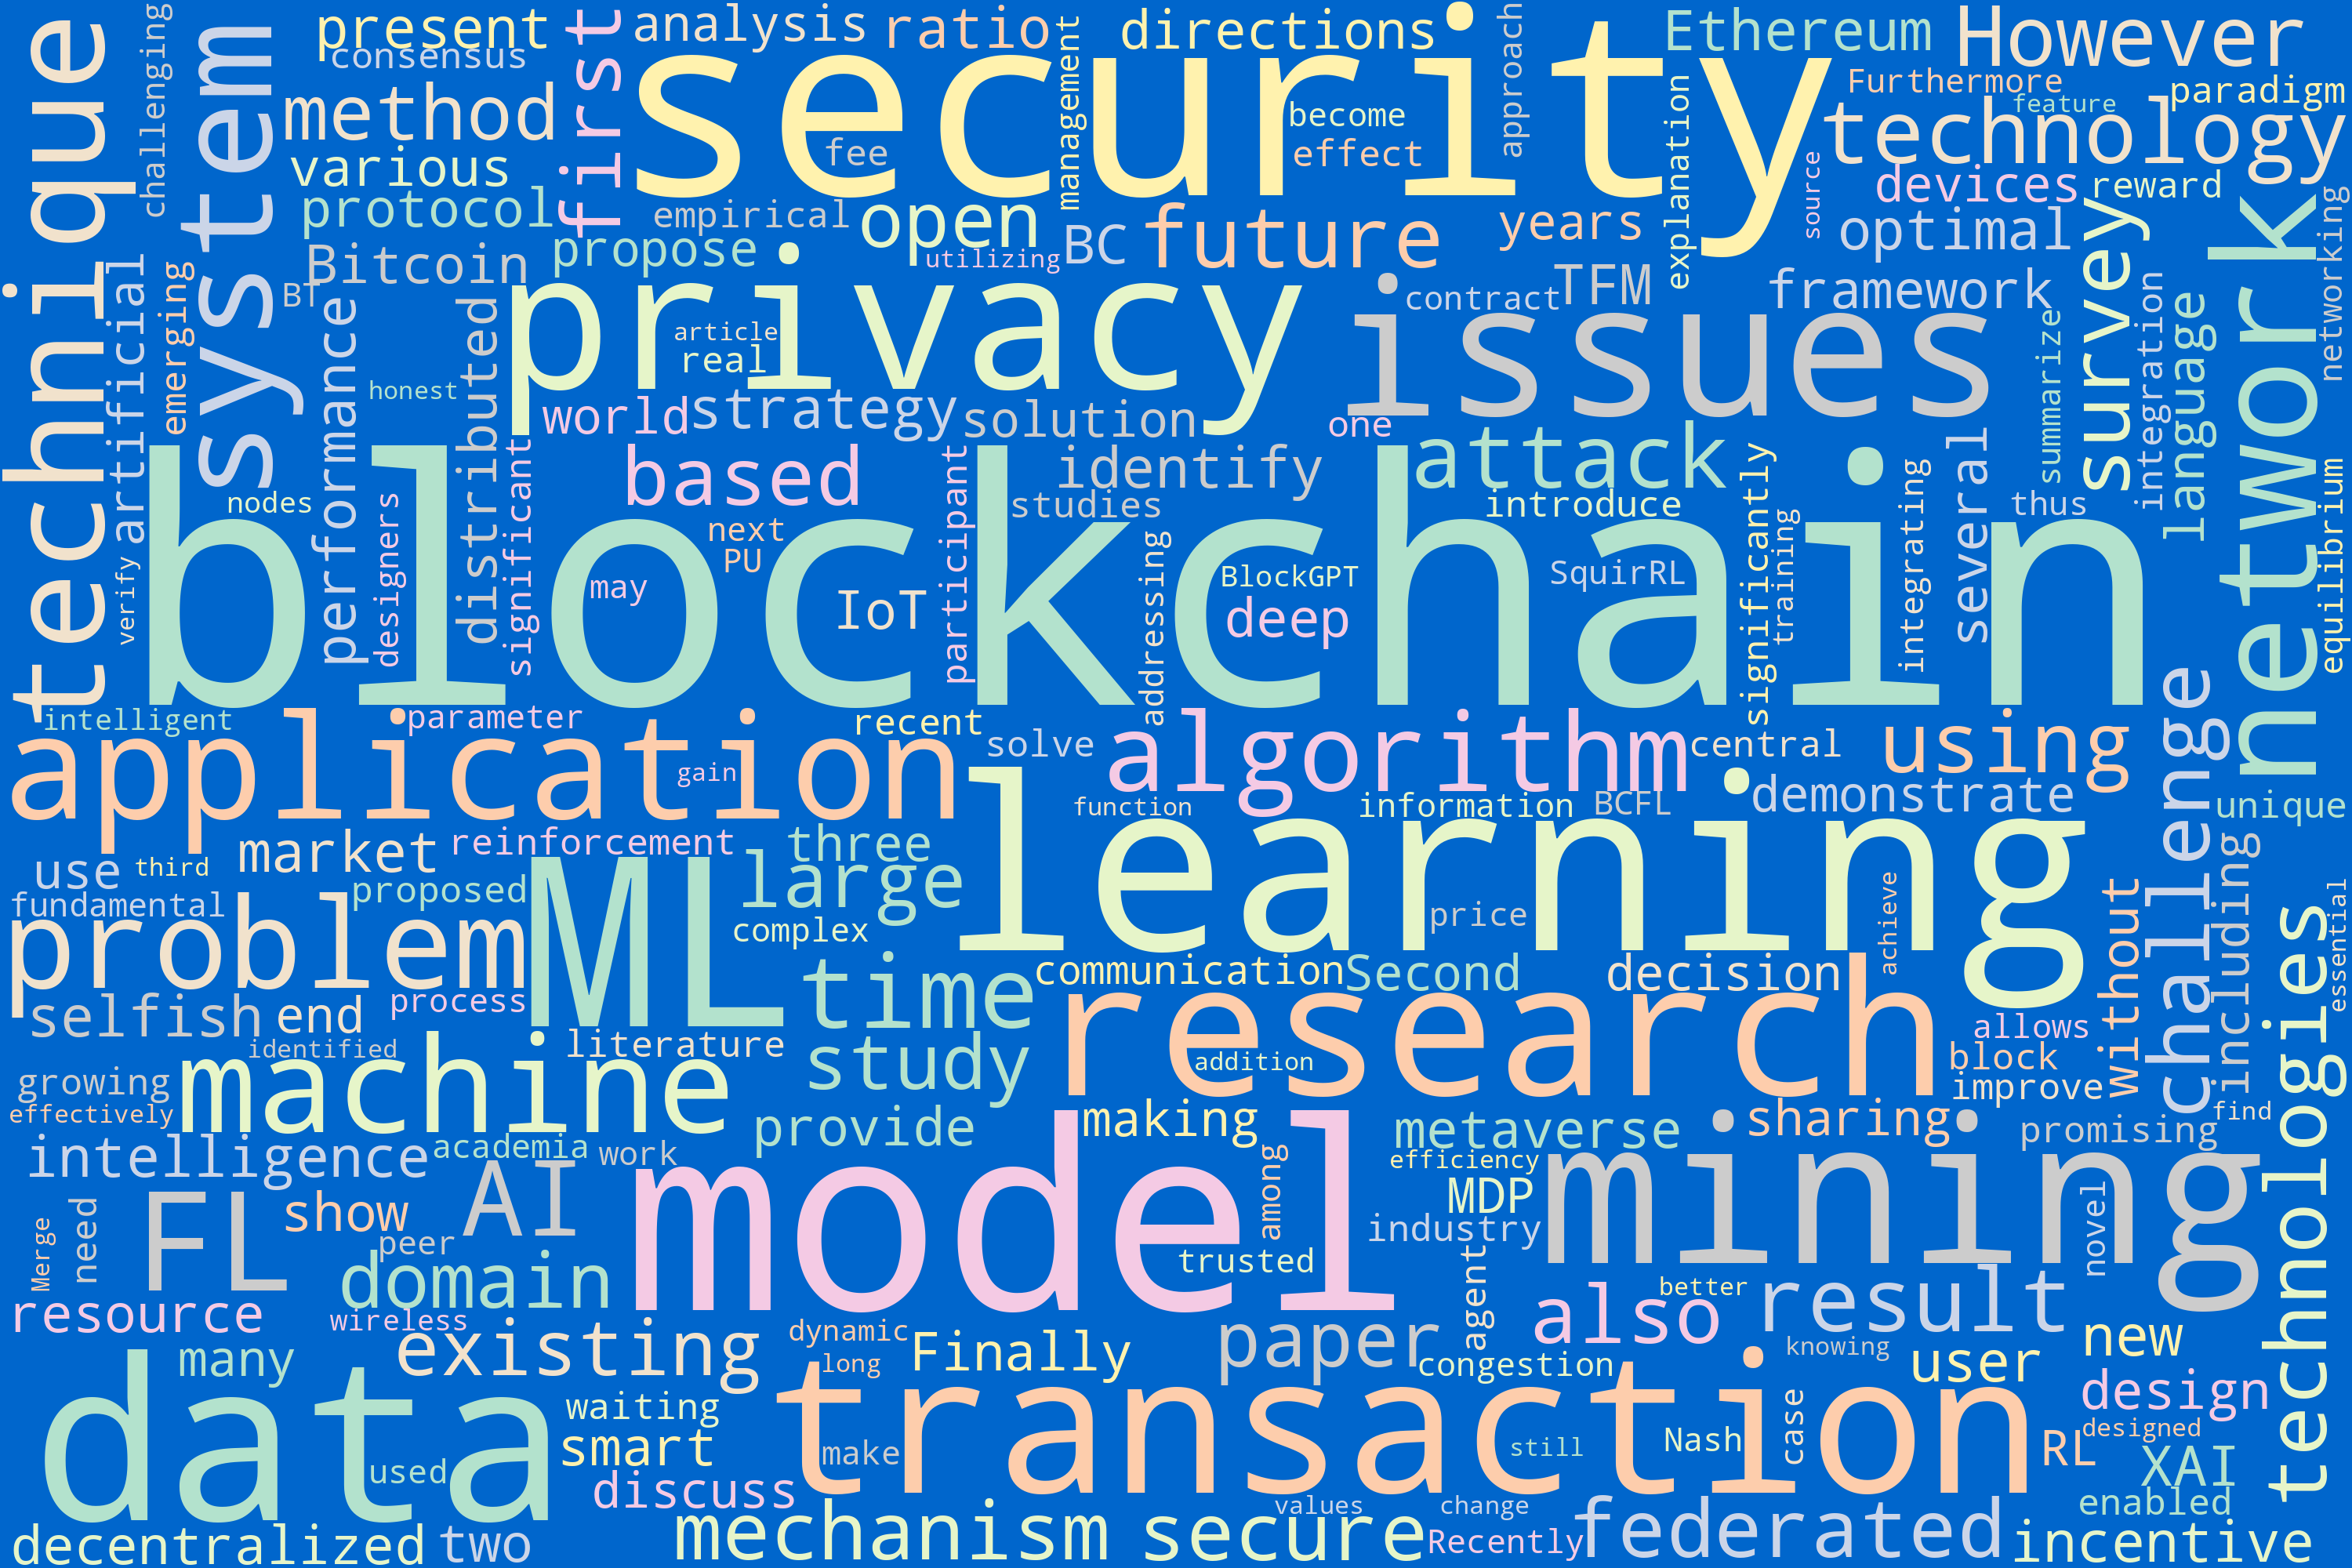

In [18]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# Show the word cloud
wordcloud.to_image()

# Part II Bigram

## 2.1. Title

In [19]:
df.columns

Index(['Item type', 'Authors', 'Title', 'Journal', 'Abstract', 'Abstract.1',
       'Abstract.2', 'Abstract.3', 'Pages', 'Institution', 'Publisher',
       'Proceedings title', 'Date published'],
      dtype='object')

In [20]:
import regex
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [21]:
df_Title  = df['Title'].str.lower()

In [22]:
Titles = ('. '.join(list(df_Title.values)))
Titles = regex.sub(r'\b[0-9]+\b\W*', '', Titles)
Titles = regex.sub(r'(?:^| )\w(?:$| )', ' ', Titles)
Titles =Titles.replace(":"," ")
Titles =Titles.replace("."," ")
Titles =Titles.replace("?"," ")
Titles =Titles.replace("("," ")
Titles =Titles.replace(")"," ")
Titles

'machine learning in/for blockchain  future and challenges  when blockchain meets ai  optimal mining strategy achieved by machine learning  understand waiting time in transaction fee mechanism  an interdisciplinary perspective  cryptocurrency valuation  an explainable ai approach  empirical analysis of eip-transaction fees, waiting times, and consensus security  werlman  to tackle whale  transactions , go deep  rl   squirrl  automating attack analysis on blockchain incentive mechanisms with deep reinforcement learning  sok  explainable machine learning for computer security applications  sok  applying machine learning in security-a survey  machine learning adoption in blockchain-based smart applications  the challenges, and way forward  security and privacy in iot using machine learning and blockchain  threats and countermeasures  fusing blockchain and ai with metaverse  survey  blockchain for ai  review and open research challenges  blockchain for federated learning toward secure dist

In [23]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [24]:
text_no_urls = remove_url(Titles)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [25]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import string

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [27]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['machine',
 'learning',
 'in/for',
 'blockchain',
 'future',
 'and',
 'challenge',
 'when',
 'blockchain',
 'meet',
 'ai',
 'optimal',
 'mining',
 'strategy',
 'achieved',
 'by',
 'machine',
 'learning',
 'understand',
 'waiting',
 'time',
 'in',
 'transaction',
 'fee',
 'mechanism',
 'an',
 'interdisciplinary',
 'perspective',
 'cryptocurrency',
 'valuation',
 'an',
 'explainable',
 'ai',
 'approach',
 'empirical',
 'analysis',
 'of',
 'eip-transaction',
 'fees,',
 'waiting',
 'times,',
 'and',
 'consensus',
 'security',
 'werlman',
 'to',
 'tackle',
 'whale',
 'transaction',
 'go',
 'deep',
 'rl',
 'squirrl',
 'automating',
 'attack',
 'analysis',
 'on',
 'blockchain',
 'incentive',
 'mechanism',
 'with',
 'deep',
 'reinforcement',
 'learning',
 'sok',
 'explainable',
 'machine',
 'learning',
 'for',
 'computer',
 'security',
 'application',
 'sok',
 'applying',
 'machine',
 'learning',
 'in',
 'security-a',
 'survey',
 'machine',
 'learning',
 'adoption',
 'in',
 'blockchain-based'

In [28]:
stop_words = stopwords.words('english')
stop_words.extend([',','survey',':','A','on','in','into','the','for','review','.','SOK:','Sok:','(sok).'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','SOK','How','sok']]
words_nsw

['machine',
 'learning',
 'in/for',
 'blockchain',
 'future',
 'challenge',
 'blockchain',
 'meet',
 'ai',
 'optimal',
 'mining',
 'strategy',
 'achieved',
 'machine',
 'learning',
 'understand',
 'waiting',
 'time',
 'transaction',
 'fee',
 'mechanism',
 'interdisciplinary',
 'perspective',
 'cryptocurrency',
 'valuation',
 'explainable',
 'ai',
 'approach',
 'empirical',
 'analysis',
 'eip-transaction',
 'fees,',
 'waiting',
 'times,',
 'consensus',
 'security',
 'werlman',
 'tackle',
 'whale',
 'transaction',
 'go',
 'deep',
 'rl',
 'squirrl',
 'automating',
 'attack',
 'analysis',
 'blockchain',
 'incentive',
 'mechanism',
 'deep',
 'reinforcement',
 'learning',
 'explainable',
 'machine',
 'learning',
 'computer',
 'security',
 'application',
 'applying',
 'machine',
 'learning',
 'security-a',
 'machine',
 'learning',
 'adoption',
 'blockchain-based',
 'smart',
 'application',
 'challenges,',
 'way',
 'forward',
 'security',
 'privacy',
 'iot',
 'using',
 'machine',
 'learning',


In [29]:
import collections

In [30]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [31]:
title_bigram=pd.DataFrame(bigram_counts)
title_bigram.columns = ['bigram', 'counts']
title_bigram = title_bigram.sort_values(by=['counts'], ascending=False)
title_bigram.head(20)

bigram  counts
0            (machine, learning)       8
3          (federated, learning)       3
1          (deep, reinforcement)       3
2      (reinforcement, learning)       3
4        (challenge, blockchain)       2
5               (blockchain, ai)       2
6              (large, language)       2
7              (language, model)       2
74                  (iot, using)       1
65  (adoption, blockchain-based)       1
73                (privacy, iot)       1
72           (security, privacy)       1
71           (forward, security)       1
70                (way, forward)       1
69            (challenges,, way)       1
68    (application, challenges,)       1
67          (smart, application)       1
66     (blockchain-based, smart)       1
61           (applying, machine)       1
64          (learning, adoption)       1

In [32]:
print(title_bigram.head(25).to_latex(index=False))

\begin{tabular}{lr}
\toprule
                      bigram &  counts \\
\midrule
         (machine, learning) &       8 \\
       (federated, learning) &       3 \\
       (deep, reinforcement) &       3 \\
   (reinforcement, learning) &       3 \\
     (challenge, blockchain) &       2 \\
            (blockchain, ai) &       2 \\
           (large, language) &       2 \\
           (language, model) &       2 \\
                (iot, using) &       1 \\
(adoption, blockchain-based) &       1 \\
              (privacy, iot) &       1 \\
         (security, privacy) &       1 \\
         (forward, security) &       1 \\
              (way, forward) &       1 \\
          (challenges,, way) &       1 \\
  (application, challenges,) &       1 \\
        (smart, application) &       1 \\
   (blockchain-based, smart) &       1 \\
         (applying, machine) &       1 \\
        (learning, adoption) &       1 \\
       (security-a, machine) &       1 \\
      (learning, security-a) &       1

<ipython-input-32-08f2aafd0111>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(title_bigram.head(25).to_latex(index=False))


In [33]:
print(title_bigram.head(25).to_markdown(index=False))

| bigram                           |   counts |
|:---------------------------------|---------:|
| ('machine', 'learning')          |        8 |
| ('federated', 'learning')        |        3 |
| ('deep', 'reinforcement')        |        3 |
| ('reinforcement', 'learning')    |        3 |
| ('challenge', 'blockchain')      |        2 |
| ('blockchain', 'ai')             |        2 |
| ('large', 'language')            |        2 |
| ('language', 'model')            |        2 |
| ('iot', 'using')                 |        1 |
| ('adoption', 'blockchain-based') |        1 |
| ('privacy', 'iot')               |        1 |
| ('security', 'privacy')          |        1 |
| ('forward', 'security')          |        1 |
| ('way', 'forward')               |        1 |
| ('challenges,', 'way')           |        1 |
| ('application', 'challenges,')   |        1 |
| ('smart', 'application')         |        1 |
| ('blockchain-based', 'smart')    |        1 |
| ('applying', 'machine')          |    

In [34]:
title_bigram.to_csv("title_bigram.csv")

In [35]:
import networkx as nx

In [36]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]

    G.add_edge(link[0], link[1], weight=count)

In [37]:
# Create dictionary of bigrams and their counts
d = title_bigram.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [38]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]

    G.add_edge(link[0], link[1], weight=count)

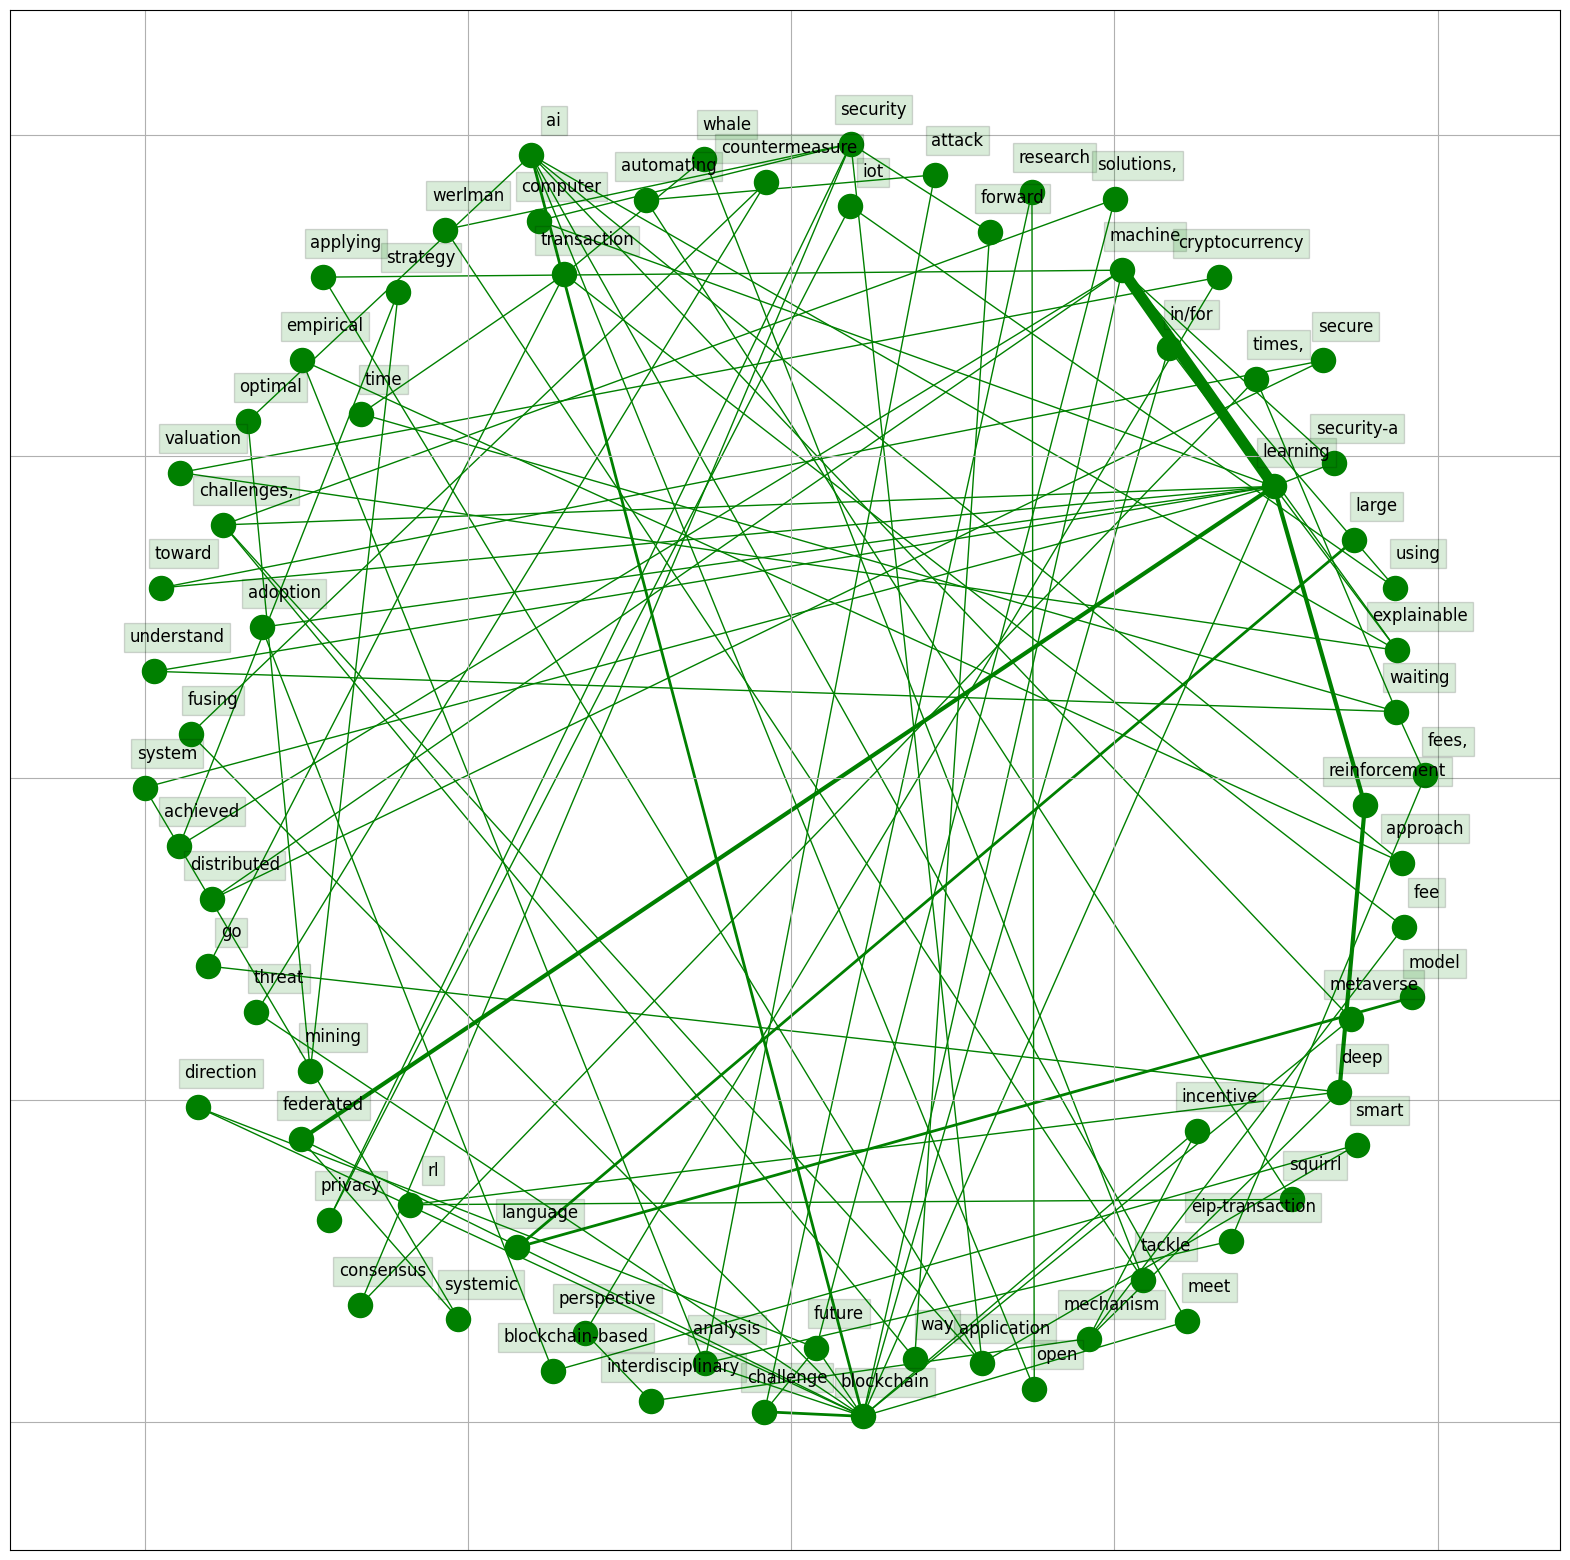

In [39]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='green',
                 node_color='green',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='green', alpha=0.15),
            horizontalalignment='center', fontsize=12)
plt.show()

In [40]:
import igviz as ig

In [41]:
import os

new_path = "figures/title_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [42]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/title_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/title_bigram.html")

<ipython-input-42-360256bff3c0>:1: DeprecationWarning: Argument `titlefont_size` is deprecated and will be removed in 0.6.0.
  fig = ig.plot(


## 2.2. Abstract

In [43]:
df_Abstract = df['Abstract'].str.lower()

In [44]:
Abstract = ('. '.join(list(df_Abstract.values)))
Abstract = regex.sub(r'\b[0-9]+\b\W*', '', Abstract)
Abstract = regex.sub(r'(?:^| )\w(?:$| )', ' ', Abstract)
Abstract =Abstract.replace(":"," ")
Abstract =Abstract.replace("."," ")
Abstract =Abstract.replace("?"," ")
Abstract =Abstract.replace("("," ")
Abstract =Abstract.replace(")"," ")
Abstract =Abstract.replace('"'," ")
Abstract =Abstract.replace(','," ")
Abstract

"machine learning and blockchain are two of the most notable technologies of recent years  the first is the foundation of artificial intelligence and big data analysis  and the second has significantly disrupted the financial industry  both technologies are data‐driven  and thus there are rapidly growing interests in integrating both for more secure and efficient data sharing and analysis  in this article  we review existing research on combining machine learning and blockchain technologies and demonstrate that they can collaborate efficiently and effectively  in the end  we point out some future directions and expect more research on deeper integration of these two promising technologies   this study applies reinforcement learning  rl  from the ai machine learning field to derive an optimal bitcoin‐like blockchain mining strategy  salient feature of the rl learning framework is that an optimal  or near‐optimal  strategy can be obtained without knowing the details of the blockchain net

In [45]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [46]:
text_no_urls = remove_url(Abstract)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [47]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['machine',
 'learning',
 'and',
 'blockchain',
 'are',
 'two',
 'of',
 'the',
 'most',
 'notable',
 'technology',
 'of',
 'recent',
 'year',
 'the',
 'first',
 'is',
 'the',
 'foundation',
 'of',
 'artificial',
 'intelligence',
 'and',
 'big',
 'data',
 'analysis',
 'and',
 'the',
 'second',
 'ha',
 'significantly',
 'disrupted',
 'the',
 'financial',
 'industry',
 'both',
 'technology',
 'are',
 'data‐driven',
 'and',
 'thus',
 'there',
 'are',
 'rapidly',
 'growing',
 'interest',
 'in',
 'integrating',
 'both',
 'for',
 'more',
 'secure',
 'and',
 'efficient',
 'data',
 'sharing',
 'and',
 'analysis',
 'in',
 'this',
 'article',
 'we',
 'review',
 'existing',
 'research',
 'on',
 'combining',
 'machine',
 'learning',
 'and',
 'blockchain',
 'technology',
 'and',
 'demonstrate',
 'that',
 'they',
 'can',
 'collaborate',
 'efficiently',
 'and',
 'effectively',
 'in',
 'the',
 'end',
 'we',
 'point',
 'out',
 'some',
 'future',
 'direction',
 'and',
 'expect',
 'more',
 'research',
 'o

In [49]:
stop_words = stopwords.words('english')
stop_words.extend([',','survey',':','A','on','in','into','the','for','review','.','SOK:','Sok:','(sok).'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','SOK','How','sok','e','g','drb','ha']]
words_nsw

['machine',
 'learning',
 'blockchain',
 'two',
 'notable',
 'technology',
 'recent',
 'year',
 'first',
 'foundation',
 'artificial',
 'intelligence',
 'big',
 'data',
 'analysis',
 'second',
 'significantly',
 'disrupted',
 'financial',
 'industry',
 'technology',
 'data‐driven',
 'thus',
 'rapidly',
 'growing',
 'interest',
 'integrating',
 'secure',
 'efficient',
 'data',
 'sharing',
 'analysis',
 'article',
 'existing',
 'research',
 'combining',
 'machine',
 'learning',
 'blockchain',
 'technology',
 'demonstrate',
 'collaborate',
 'efficiently',
 'effectively',
 'end',
 'point',
 'future',
 'direction',
 'expect',
 'research',
 'deeper',
 'integration',
 'two',
 'promising',
 'technology',
 'study',
 'applies',
 'reinforcement',
 'learning',
 'rl',
 'ai',
 'machine',
 'learning',
 'field',
 'derive',
 'optimal',
 'bitcoin‐like',
 'blockchain',
 'mining',
 'strategy',
 'salient',
 'feature',
 'rl',
 'learning',
 'framework',
 'optimal',
 'near‐optimal',
 'strategy',
 'obtained',


In [50]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [51]:
abstract_bigram=pd.DataFrame(bigram_counts)
abstract_bigram.columns = ['bigram', 'counts']
abstract_bigram = abstract_bigram.sort_values(by=['counts'], ascending=False)
abstract_bigram.head(25)

bigram  counts
0          (security, privacy)      13
1          (machine, learning)      12
2        (federated, learning)      10
3     (blockchain, technology)       8
4            (selfish, mining)       8
5              (ml, algorithm)       8
6              (bc, technique)       7
7            (language, model)       7
10            (privacy, issue)       6
11             (algorithm, bc)       6
12           (large, language)       6
9           (mining, strategy)       6
8   (artificial, intelligence)       6
13   (reinforcement, learning)       5
14             (waiting, time)       5
15      (incentive, mechanism)       5
16              (learning, ml)       5
24         (nash, equilibrium)       4
30         (wireless, network)       4
29            (blockchain, ml)       4
28               (end, device)       4
27               (iot, domain)       4
26                 (using, ml)       4
25            (paper, present)       4
20        (market, congestion)       4

In [52]:
print(abstract_bigram.head(25).to_latex(index=False))

\begin{tabular}{lr}
\toprule
                    bigram &  counts \\
\midrule
       (security, privacy) &      13 \\
       (machine, learning) &      12 \\
     (federated, learning) &      10 \\
  (blockchain, technology) &       8 \\
         (selfish, mining) &       8 \\
           (ml, algorithm) &       8 \\
           (bc, technique) &       7 \\
         (language, model) &       7 \\
          (privacy, issue) &       6 \\
           (algorithm, bc) &       6 \\
         (large, language) &       6 \\
        (mining, strategy) &       6 \\
(artificial, intelligence) &       6 \\
 (reinforcement, learning) &       5 \\
           (waiting, time) &       5 \\
    (incentive, mechanism) &       5 \\
            (learning, ml) &       5 \\
       (nash, equilibrium) &       4 \\
       (wireless, network) &       4 \\
          (blockchain, ml) &       4 \\
             (end, device) &       4 \\
             (iot, domain) &       4 \\
               (using, ml) &       4 \\
  

<ipython-input-52-d3321eaeb648>:1: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



In [53]:
print(abstract_bigram.head(25).to_markdown(index=False))

| bigram                         |   counts |
|:-------------------------------|---------:|
| ('security', 'privacy')        |       13 |
| ('machine', 'learning')        |       12 |
| ('federated', 'learning')      |       10 |
| ('blockchain', 'technology')   |        8 |
| ('selfish', 'mining')          |        8 |
| ('ml', 'algorithm')            |        8 |
| ('bc', 'technique')            |        7 |
| ('language', 'model')          |        7 |
| ('privacy', 'issue')           |        6 |
| ('algorithm', 'bc')            |        6 |
| ('large', 'language')          |        6 |
| ('mining', 'strategy')         |        6 |
| ('artificial', 'intelligence') |        6 |
| ('reinforcement', 'learning')  |        5 |
| ('waiting', 'time')            |        5 |
| ('incentive', 'mechanism')     |        5 |
| ('learning', 'ml')             |        5 |
| ('nash', 'equilibrium')        |        4 |
| ('wireless', 'network')        |        4 |
| ('blockchain', 'ml')           |

In [54]:
abstract_bigram.to_csv("abstract_bigram.csv")

In [55]:
# Create dictionary of bigrams and their counts
d = abstract_bigram.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [56]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]

    G.add_edge(link[0], link[1], weight=count/10)

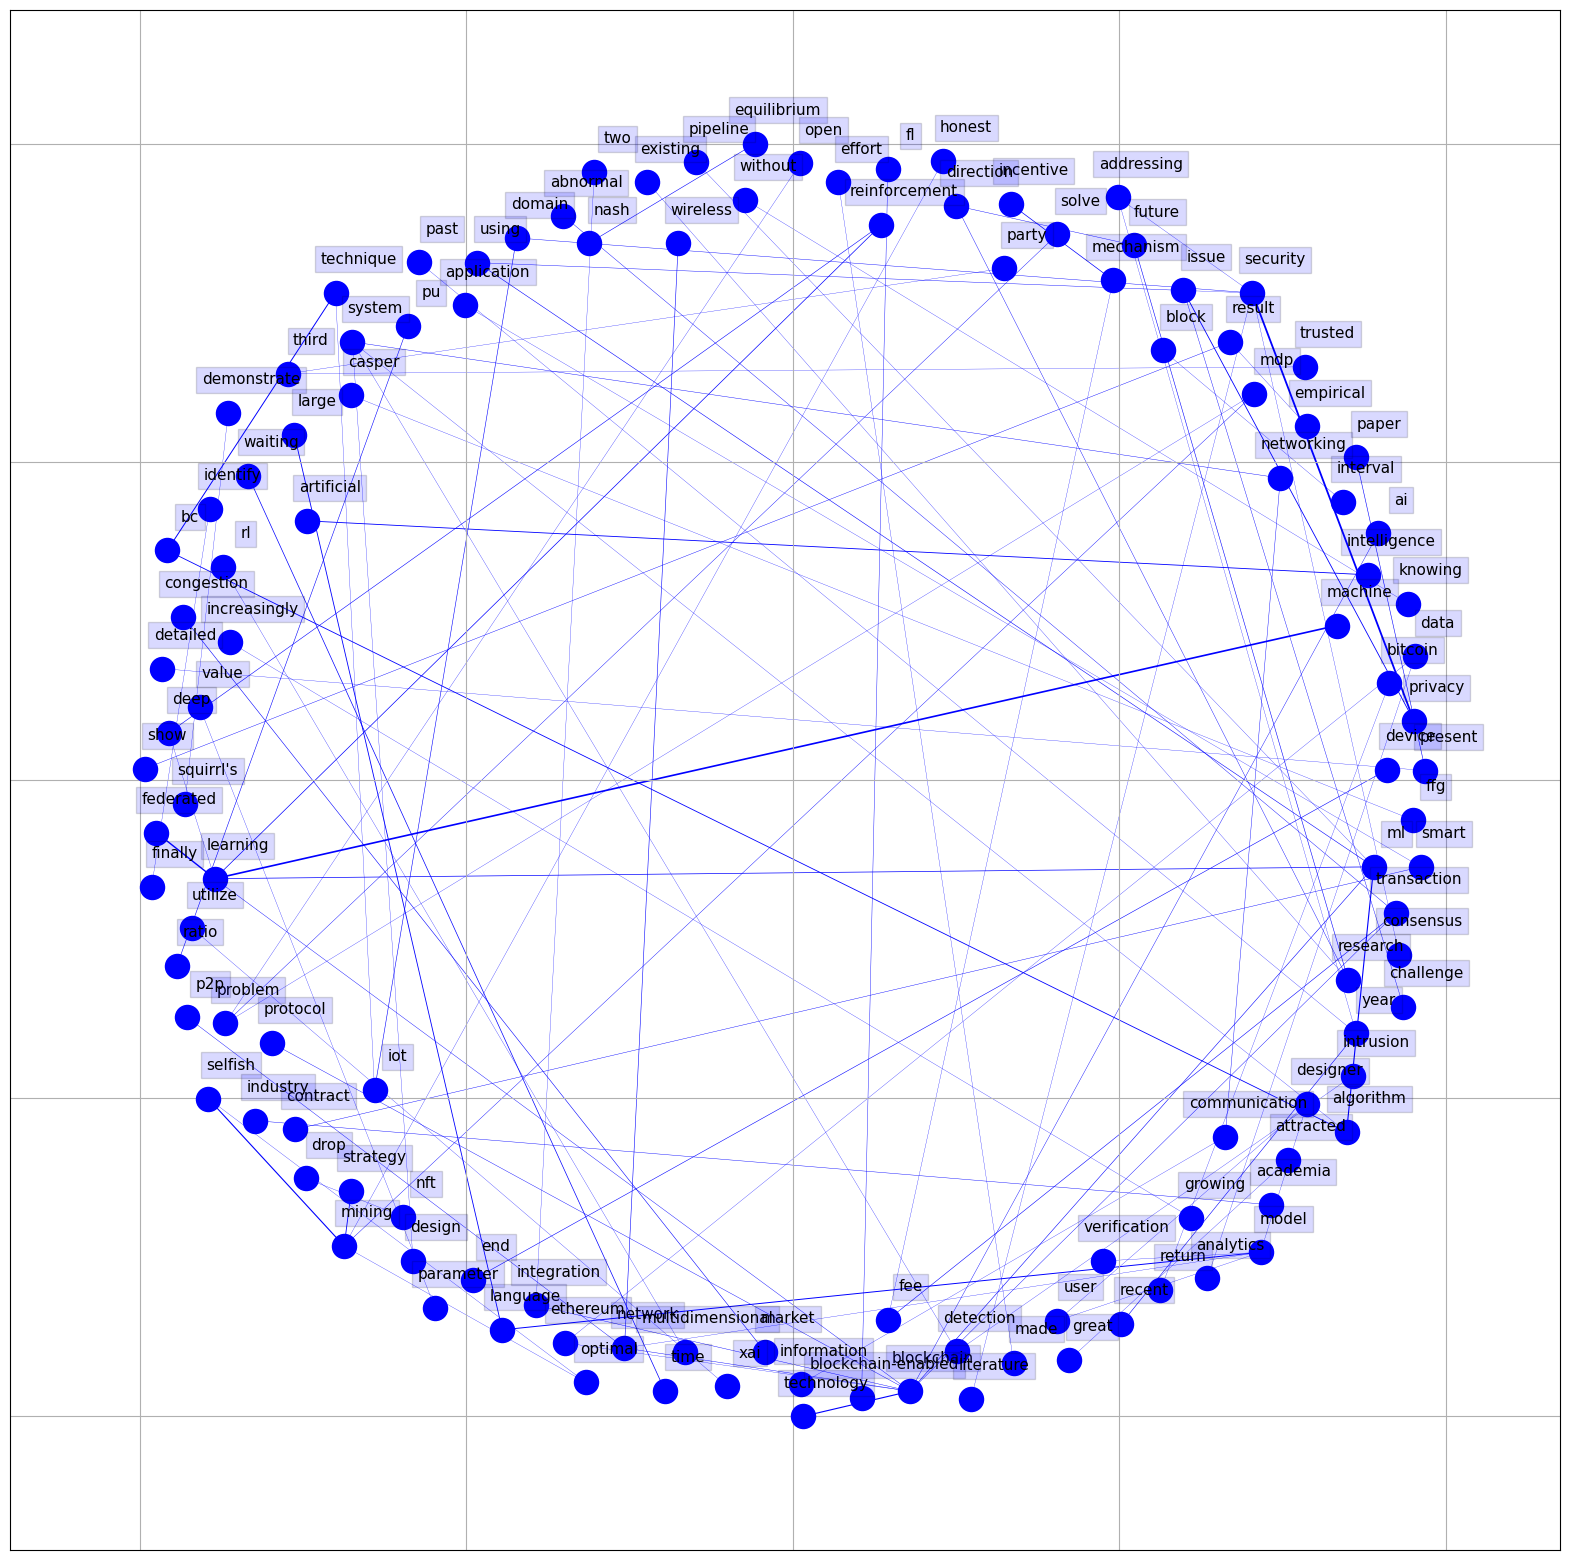

In [57]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='blue',
                 node_color='blue',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='blue', alpha=0.15),
            horizontalalignment='center', fontsize=11)

plt.show()

In [58]:
import os

new_path = "figures/Abstract_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [59]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/Abstract_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/Abstract_bigram.html")

<ipython-input-59-017664b3c192>:1: DeprecationWarning:

Argument `titlefont_size` is deprecated and will be removed in 0.6.0.

